# Kaggle CORD-19 Challenge  

Investigating various aspects of the COVID-19 virus using various research papers from across the globe.

Author: Rohan Ravindran 

In [443]:
import os
import json
import pandas as pd
from tqdm import tqdm

file_names = ['biorxiv_medrxiv', 'comm_use_subset', 'noncomm_use_subset']

data = []
for d in file_names:
    for file in tqdm(os.listdir('CORD-19-research-challenge/{}/{}/pdf_json'.format(d,d))):        
        file_path = 'CORD-19-research-challenge/{}/{}/pdf_json/{}'.format(d,d, file)
        json_file = json.load(open(file_path, 'rb'))

        title = json_file['metadata']['title']
        
        try:
            abstract = json_file['abstract'][0]['text']
        except:
            abstract = ""
       
        full_text = ""
        
        for t in json_file['body_text']:
            text = t['text'] + '\n\n'
            full_text += text
            
        data.append([title, abstract, full_text])
            
        

df = pd.DataFrame(data, columns=['title', 'abstract', 'text'])
df.head()

100%|██████████| 2466/2466 [00:08<00:00, 297.76it/s]


,title,abstract,text
0,Relationship between Average Daily Temperature...,The rapid outbreak of the new Coronavirus pand...,The outbreak of infectious diseases has always...
1,Multimerization of HIV-1 integrase hinges on c...,New anti-AIDS treatments must be continually d...,"In the absence of a curative treatment, the hi..."
2,Virus shedding patterns in nasopharyngeal and ...,,"the author/funder, who has granted medRxiv a l..."
3,Time-varying transmission dynamics of Novel Co...,Rationale: Several studies have estimated basi...,"Eighteen years ago, severe acute respiratory s..."
4,p53 is not necessary for DUX4 pathology,Summary Statement: DUX4 is thought to mediate ...,Facioscapulohumeral muscular dystrophy (FSHD) ...


# Investigating how COVID-19 survives on different surfaces

In [436]:
data = []

for index, row in df.iterrows():
    if row['text'].find('surface') > -1:
        data.append(row)

data = pd.DataFrame(data, columns=['title', 'abstract', 'text'])
len(data)

4717

In [437]:
data.head()

,title,abstract,text
0,Relationship between Average Daily Temperature...,The rapid outbreak of the new Coronavirus pand...,The outbreak of infectious diseases has always...
1,Multimerization of HIV-1 integrase hinges on c...,New anti-AIDS treatments must be continually d...,"In the absence of a curative treatment, the hi..."
23,A Multiscale and Comparative Model for Recepto...,The respiratory syndrome caused by a new type ...,The coronavirus disease 2019 has emerged at th...
24,The potential SARS-CoV-2 entry inhibitor,has rapidly spread to almost all parts of worl...,"In December 2019, an outbreak of coronavirus d..."
27,Analysis and Prediction of COVID-19 Patients' ...,Background: False negative results of SARS-CoV...,"COVID-19, the disease caused by SARS-CoV-2 vir..."


In [438]:
total = data['text'].values
sentences = []

for t in total:
    for sent in t.split(". "):
        if sent.find('plastic') > -1:
            sentences.append(sent)

In [439]:
int_sentences = []

for sent in sentences:
    sent = sent.lower()
    if sent.find('survival') > -1 or sent.find('material') > -1 or sent.find('day') > -1 or sent.find('surface') > -1:
        if sent.find('day') > -1 or sent.find('hour') > -1:
            int_sentences.append(sent)

In [440]:
import re

time_period = []

for sent in int_sentences:
    day = re.findall(r" \d{1,2} day", sent)
    hour = re.findall(r" \d{1,2} hour", sent)
    
    if len(day) > 0:
        for i in day:
            time_period.append(float(i.split()[0]))
    
    if len(day) > 0:
        for i in hour:
            time_period.append(float(i.split()[0]) / 24)
    
print(time_period)

[9.0, 21.0, 4.0, 0.16666666666666666, 3.0, 0.125, 1.0, 5.0, 15.0, 20.0, 20.0, 20.0, 20.0, 5.0, 0.0, 10.0, 11.0, 11.0, 2.0, 5.0, 14.0, 14.0, 5.0, 14.0]


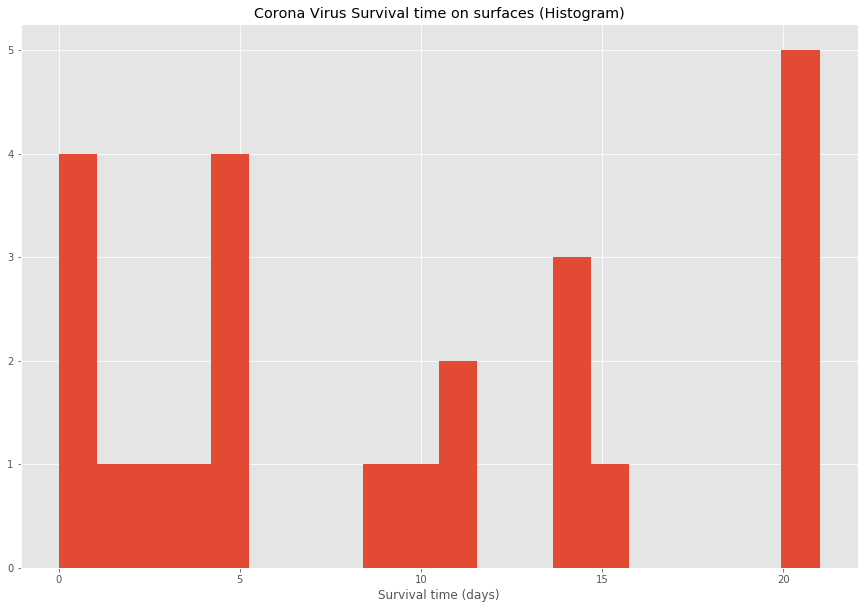

In [441]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

style.use('ggplot')

plt.figure(figsize=[15,10])
plt.hist(time_period, bins=20)
plt.xlabel('Survival time (days)')
plt.title("Corona Virus Survival time on surfaces (Histogram)")
plt.show()

In [442]:
from statistics import mean, median

print('Survival time Mean: ', mean(time_period), 'days')
print('Survival time Median: ', median(time_period), 'days')

Survival time Mean:  9.553819444444445 days
Survival time Median:  9.5 days


## Findings
- The survival of the COVID-19 virus varies when on different surfaces. On avergae, the virus can survive for 3-4 days on plastic and satinless steel surfaces, 1-2 days on cardboard, 3 hours in aerosol form, and 4 hours on copper.
- The virus can survive longer on hard surfaces compared to more porous surfaces. 
- Heat does seem to have some affect on the life of COVID-19 on plastic surfaces.

# Investigating COVID-19 Incubation Period

In [444]:
data = []

for index, row in df.iterrows():
    if row['text'].find('incubation') > -1:
        data.append(row)

data = pd.DataFrame(data, columns=['title', 'abstract', 'text'])
len(data)

1119

In [445]:
data.head()

,title,abstract,text
3,Time-varying transmission dynamics of Novel Co...,Rationale: Several studies have estimated basi...,"Eighteen years ago, severe acute respiratory s..."
6,Potential impact of seasonal forcing on a SARS...,A novel coronavirus (SARS-CoV-2) first detecte...,(2.2 with 90% high density interval 1.4-3.8 (R...
11,Monitoring Italian COVID-19 spread by an adapt...,Due to the recent diffusion of COVID-19 outbre...,The recent diffusion of the COVID-19 Corona-vi...
23,A Multiscale and Comparative Model for Recepto...,The respiratory syndrome caused by a new type ...,The coronavirus disease 2019 has emerged at th...
25,"Development and validation of a rapid, single-...",19 Objectives: Development and validation of a...,Primers showing optimal in-silico features wer...


In [446]:
total = data['text'].values

In [447]:
sentences_all = []

for t in total:
    for sentence in t.split(". "):
        if "incubation" in sentence.lower():
            sentences_all.append(sentence.lower())

In [448]:
incubation_period = []

for sent in sentences_all:
    if sent.find('day') > -1:
        day = re.findall("(\d{1,2})(\.\d{1,2})? day", sent)
        
        if len(day) > 0:            
            day = day[0]
            day_tot = '{}{}'.format(day[0], day[1])
            incubation_period.append(float(day_tot))        
        
print(incubation_period)

[5.0, 5.0, 5.0, 12.5, 3.01, 5.0, 5.2, 13.0, 5.1, 14.0, 14.0, 7.0, 9.5, 14.0, 33.0, 7.0, 9.0, 14.0, 14.0, 21.0, 5.2, 7.0, 14.0, 14.0, 33.0, 14.0, 7.0, 26.0, 5.1, 14.0, 3.0, 3.0, 7.0, 10.0, 10.0, 6.0, 10.0, 14.0, 14.0, 5.0, 5.0, 5.0, 7.0, 5.2, 5.2, 4.75, 28.0, 7.4, 7.0, 14.0, 7.4, 7.0, 14.0, 9.4, 5.0, 4.0, 5.0, 5.0, 5.2, 8.42, 5.2, 18.0, 2.5, 5.1, 5.2, 6.0, 4.0, 14.0, 5.2, 5.2, 14.0, 6.0, 7.5, 6.4, 2.8, 5.2, 2.8, 6.4, 11.1, 6.5, 10.0, 10.0, 6.4, 7.5, 3.4, 14.0, 11.5, 5.0, 14.0, 14.0, 11.1, 15.5, 11.1, 14.0, 50.0, 2.98, 2.98, 10.0, 3.0, 14.0, 5.1, 27.0, 3.0, 3.0, 5.1, 5.2, 10.0, 1.01, 42.0, 5.2, 1.0, 7.0, 7.0, 4.5, 7.0, 6.1, 7.0, 5.01, 11.0, 5.0, 4.0, 5.2, 7.0, 3.9, 22.0, 22.0, 22.0, 2.6, 7.0, 4.0, 14.0, 5.0, 9.0, 14.0, 14.0, 1.0, 6.0, 6.0, 3.0, 11.0, 6.0, 5.2, 5.2, 7.5, 5.9, 7.0, 4.6, 6.5, 14.0, 5.0, 12.89, 14.0, 6.0, 8.8, 8.0, 5.2, 14.0, 23.0, 14.0, 14.0, 7.0, 5.2, 7.0, 12.5, 14.0, 7.0, 14.0, 14.0, 28.0, 12.0, 14.0, 14.0, 6.0, 5.0, 2.0, 14.0, 5.0, 5.0, 1.0, 9.0, 4.84, 1.0, 6.5, 6.5, 3.0

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


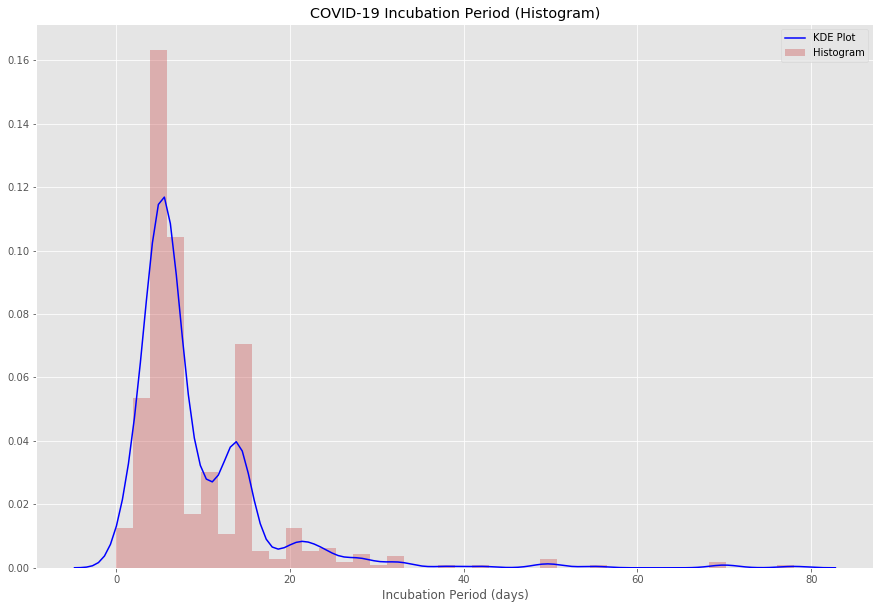

In [449]:
plt.figure(figsize=[15,10])
sns.distplot(incubation_period, bins=40, kde_kws={'color': 'blue', 'label': 'KDE Plot'}, hist_kws={'color': 'indianred', 'label': 'Histogram'})
plt.xlabel('Incubation Period (days)')
plt.title("COVID-19 Incubation Period (Histogram)")
plt.show()

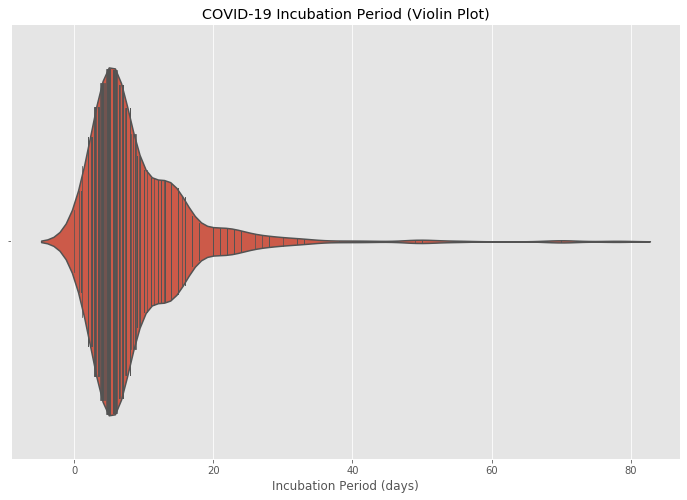

In [450]:
plt.figure(figsize=[12,8])
sns.violinplot(incubation_period, vert=True, inner='stick')
plt.title("COVID-19 Incubation Period (Violin Plot)")
plt.xlabel('Incubation Period (days)')
plt.show()

In [451]:
from statistics import mean, median

print('Incubation Period Mean: ', mean(incubation_period), 'days')
print('Incubation Period Median: ', median(incubation_period), 'days')

Incubation Period Mean:  9.114382608695653 days
Incubation Period Median:  6.1 days


## Findings
- The mean and median incubation period of the COVID-19 virus are 9.1 days and 6.1 days respectively according to the data used. 

## Steps for improvement
- The method used above to find virus survival on various surface and incubation period data is not perfect. A lot of information was missed, and some information was improperly used in my research. A more advanced technique of sifting through the large dataset will be required for more accurate findings instead of simply using regular experssions. 
